<a href="https://colab.research.google.com/github/SantiArandaRod/dev_bridgesCundinamarca/blob/main/dev_bridgesColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/SantiArandaRod/dev_bridgesCundinamarca.git

Cloning into 'dev_bridgesCundinamarca'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), done.
Resolving deltas: 100% (1/1), done.


In [10]:
from google.colab import files
uploaded = files.upload()

Saving bridges.csv to bridges.csv


In [11]:
import pandas as pd
df = pd.read_csv('bridges.csv')
df.head()

,X,Y,OBJECTID,TRONCAL,NUM_TRONCA,CODIGO_TRAMO,NOMBRE_TRAMO,TIPO_OBRA,ANCHO,LONGITUD,PLACA,BARANDAS,ESTRIBO_DER,ESTRIBO_IZQ,FUENTE,VIGENCIA,ID_PUENTE,RuleID
0,-73.328913,4.749877,1,TRONCAL DEL GUAVIO,13,46,RIO TROMPETAS-MAMBITA 2,METALICO,6.5,25.0,BUENO,REGULAR,BUENO,BUENO,INCOPLAN,2009,2099273600,1
1,-74.834582,4.386253,2,MAGDALENA CENTRO,21,73,GIRARDOT - NARIÑO,CONCRETO,9.0,3.0,NO INF,BUENO,BUENO,BUENO,INCOPLAN,2009,2099273576,1
2,-74.854983,4.334149,3,MAGDALENA CENTRO,21,73,GIRARDOT - NARIÑO,CONCRETO,8.0,5.0,BUENO,BUENO,BUENO,BUENO,INCOPLAN,2009,2099273528,1
3,-74.858724,4.329052,4,MAGDALENA CENTRO,21,73,GIRARDOT - NARIÑO,CONCRETO,10.0,1.0,NO INF,BUENO,BUENO,BUENO,INCOPLAN,2009,2099273504,1
4,-74.799662,4.468792,5,MAGDALENA CENTRO,21,42,NARIÑO-GUATAQUI,CONCRETO,8.0,4.0,BUENO,MALO,BUENO,BUENO,INCOPLAN,2009,2099273456,1


In [12]:
variables = ['PLACA', 'BARANDAS', 'ESTRIBO_DER', 'ESTRIBO_IZQ']

for col in variables:
    print(f"\n== Frecuencias para {col} ==")
    print(df[col].value_counts(dropna=False))


== Frecuencias para PLACA ==
PLACA
BUENO      165
REGULAR     76
MALO        26
NO INF       5
Name: count, dtype: int64

== Frecuencias para BARANDAS ==
BARANDAS
NO INF     170
BUENO       39
REGULAR     36
MALO        27
Name: count, dtype: int64

== Frecuencias para ESTRIBO_DER ==
ESTRIBO_DER
BUENO      209
REGULAR     41
MALO        18
NO INF       4
Name: count, dtype: int64

== Frecuencias para ESTRIBO_IZQ ==
ESTRIBO_IZQ
BUENO      208
REGULAR     41
MALO        18
NO INF       5
Name: count, dtype: int64


In [13]:
import numpy as np

def agrupar_y_frecuencia(columna, k=None):
    datos = df[columna].dropna()
    vmin, vmax = datos.min(), datos.max()
    R = vmax - vmin

    if k is None:
        k = int(np.ceil(1 + 3.322 * np.log10(len(datos))))

    A = R / k
    print(f"\n== {columna.upper()} ==")
    print(f"Min: {vmin}, Max: {vmax}, Rango: {R}, k: {k}, Amplitud: {A:.2f}")

    bins = np.linspace(vmin, vmax, k + 1)
    df['intervalos_' + columna] = pd.cut(df[columna], bins=bins, include_lowest=True)

    tabla = df['intervalos_' + columna].value_counts().sort_index()
    print(tabla)

agrupar_y_frecuencia('ANCHO', k=6)
agrupar_y_frecuencia('LONGITUD', k=6)



== ANCHO ==
Min: 0.0, Max: 15.0, Rango: 15.0, k: 6, Amplitud: 2.50
intervalos_ANCHO
(-0.001, 2.5]     42
(2.5, 5.0]        25
(5.0, 7.5]        86
(7.5, 10.0]      113
(10.0, 12.5]       5
(12.5, 15.0]       1
Name: count, dtype: int64

== LONGITUD ==
Min: 0.0, Max: 120.0, Rango: 120.0, k: 6, Amplitud: 20.00
intervalos_LONGITUD
(-0.001, 20.0]    242
(20.0, 40.0]       22
(40.0, 60.0]        4
(60.0, 80.0]        3
(80.0, 100.0]       0
(100.0, 120.0]      1
Name: count, dtype: int64


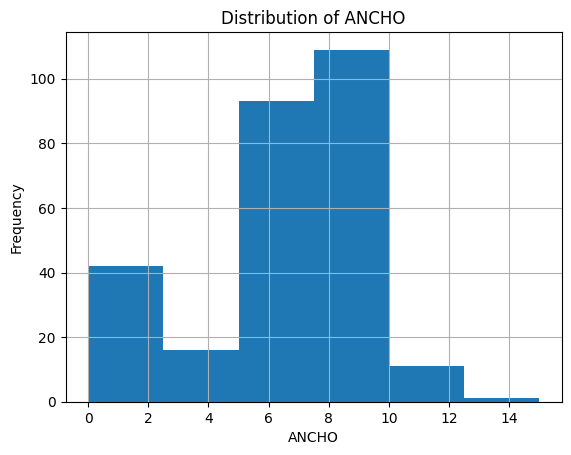

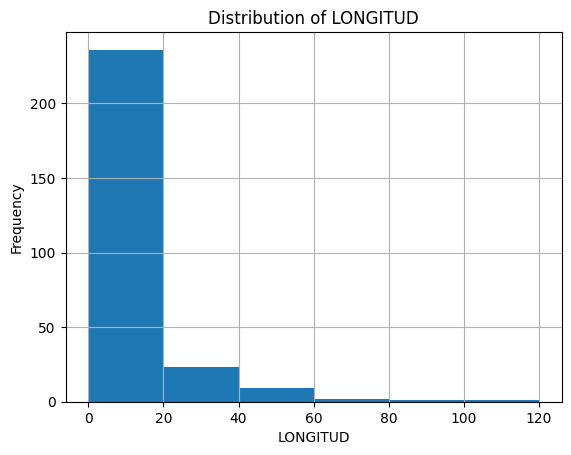

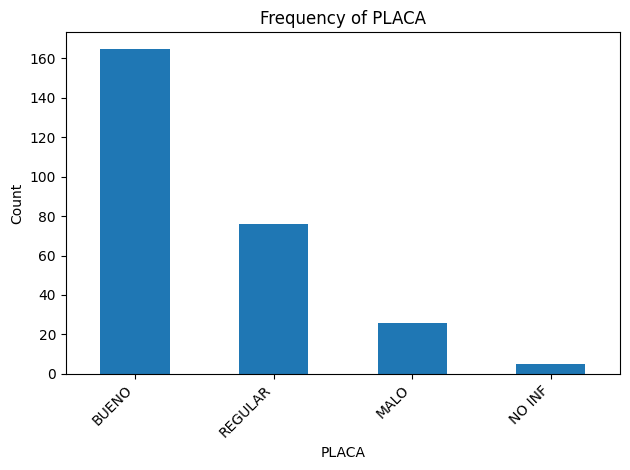

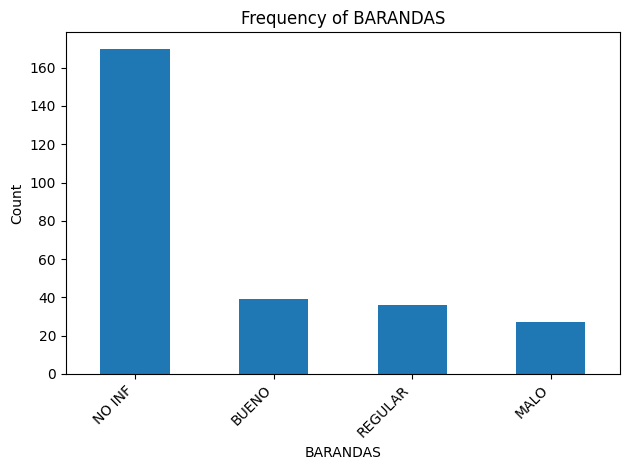

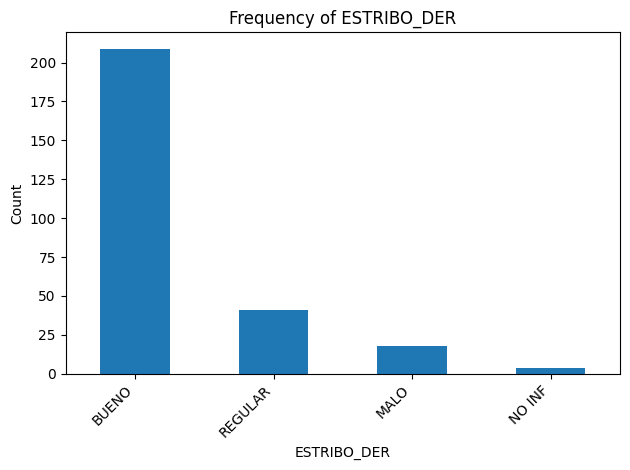

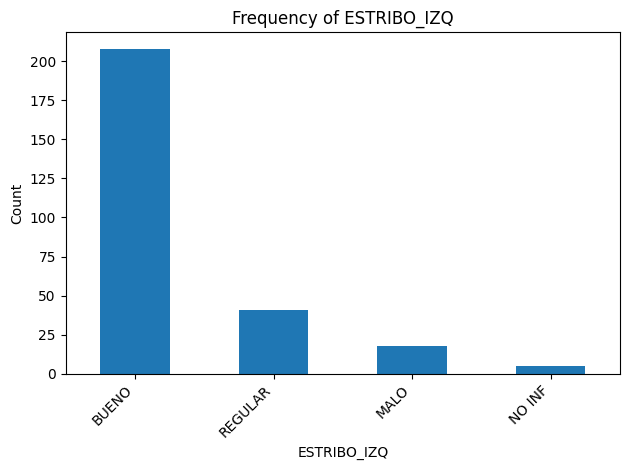


== Descriptive Statistics for Numerical Columns ==
            ANCHO    LONGITUD
count  272.000000  272.000000
mean     6.209191    9.626103
std      3.049510   13.734747
min      0.000000    0.000000
25%      5.875000    3.000000
50%      7.000000    5.000000
75%      8.000000   10.000000
max     15.000000  120.000000

== Relationship between BARANDAS and ANCHO ==
BARANDAS
BUENO      7.576923
MALO       5.733333
NO INF     6.073529
REGULAR    5.725000
Name: ANCHO, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df['ANCHO'].hist(bins=6)
plt.title('Distribution of ANCHO')
plt.xlabel('ANCHO')
plt.ylabel('Frequency')
plt.show()

df['LONGITUD'].hist(bins=6)
plt.title('Distribution of LONGITUD')
plt.xlabel('LONGITUD')
plt.ylabel('Frequency')
plt.show()

for col in variables:
    plt.figure()
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\n== Descriptive Statistics for Numerical Columns ==")
print(df[['ANCHO', 'LONGITUD']].describe())


print("\n== Relationship between BARANDAS and ANCHO ==")
print(df.groupby('BARANDAS')['ANCHO'].mean())


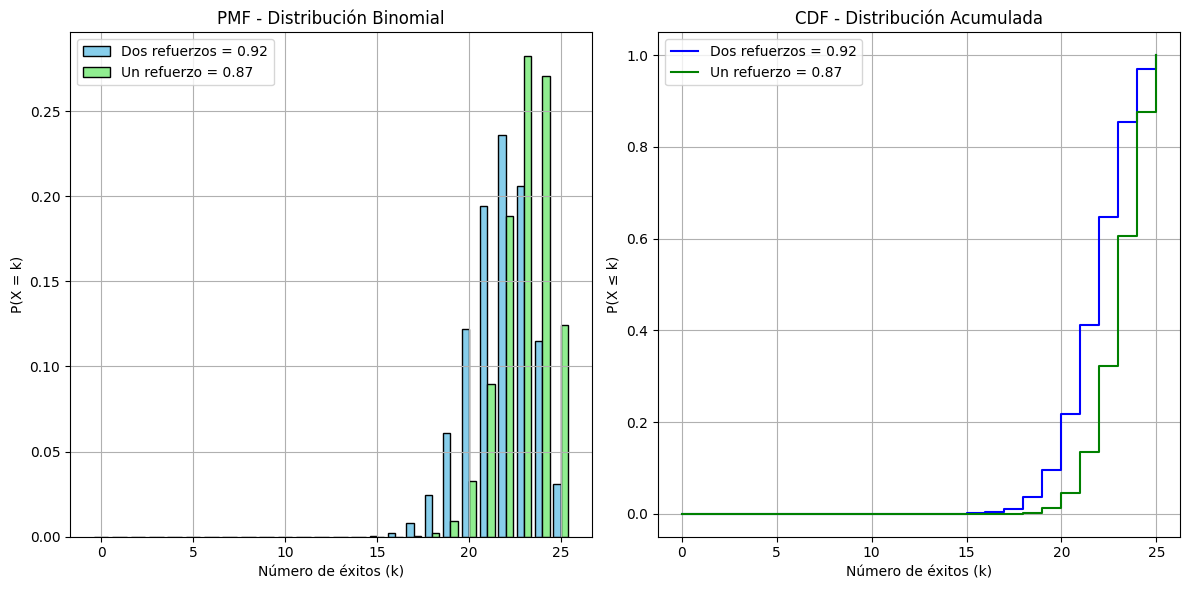

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n=25
p_withOneReforce=0.87
p_withTwoReforce=0.92
k=np.arange(0,n+1)

pmf=binom.pmf(k,n,p_withOneReforce)
pmf2=binom.pmf(k,n,p_withTwoReforce)
cdf = binom.cdf(k, n, p_withOneReforce)
cdf2 = binom.cdf(k, n, p_withTwoReforce)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.bar(k - 0.2, pmf, width=0.4, label='Dos refuerzos = 0.92', color='skyblue', edgecolor='black')
plt.bar(k + 0.2, pmf2, width=0.4, label='Un refuerzo = 0.87', color='lightgreen', edgecolor='black')
plt.title('PMF - Distribución Binomial')
plt.xlabel('Número de éxitos (k)')
plt.ylabel('P(X = k)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.step(k, cdf, where='post', label='Dos refuerzos = 0.92', color='blue')
plt.step(k, cdf2, where='post', label='Un refuerzo = 0.87', color='green')
plt.title('CDF - Distribución Acumulada')
plt.xlabel('Número de éxitos (k)')
plt.ylabel('P(X ≤ k)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()